#  House Price Prediction using Linear Regression

##  Project Objective

The objective of this project is to build a **Linear Regression model** that can predict house prices based on several features such as area, number of bedrooms, location details, amenities, and more. This provides a hands-on understanding of how linear regression works for regression problems.


### Step 1: Import Required Libraries

We begin by importing essential libraries for data handling, visualization, model building, and evaluation:
- `pandas`, `numpy` for data manipulation
- `matplotlib`, `seaborn` for visualizations
- `sklearn` for building and evaluating the regression model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


### Step 2: Load the Dataset

We load the `Housing.csv` dataset using `pandas` and display the first few rows to understand the structure of the data.


In [ ]:
df = pd.read_csv('/content/Housing.csv')
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


### Step 3: Explore the Data

We check:
- The data types of each column
- The presence of any missing values
- Basic statistical summary using `.describe()`
This helps in identifying data quality issues and planning for preprocessing.


In [ ]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
# Check for the missing values
df.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
# Statistical summary
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


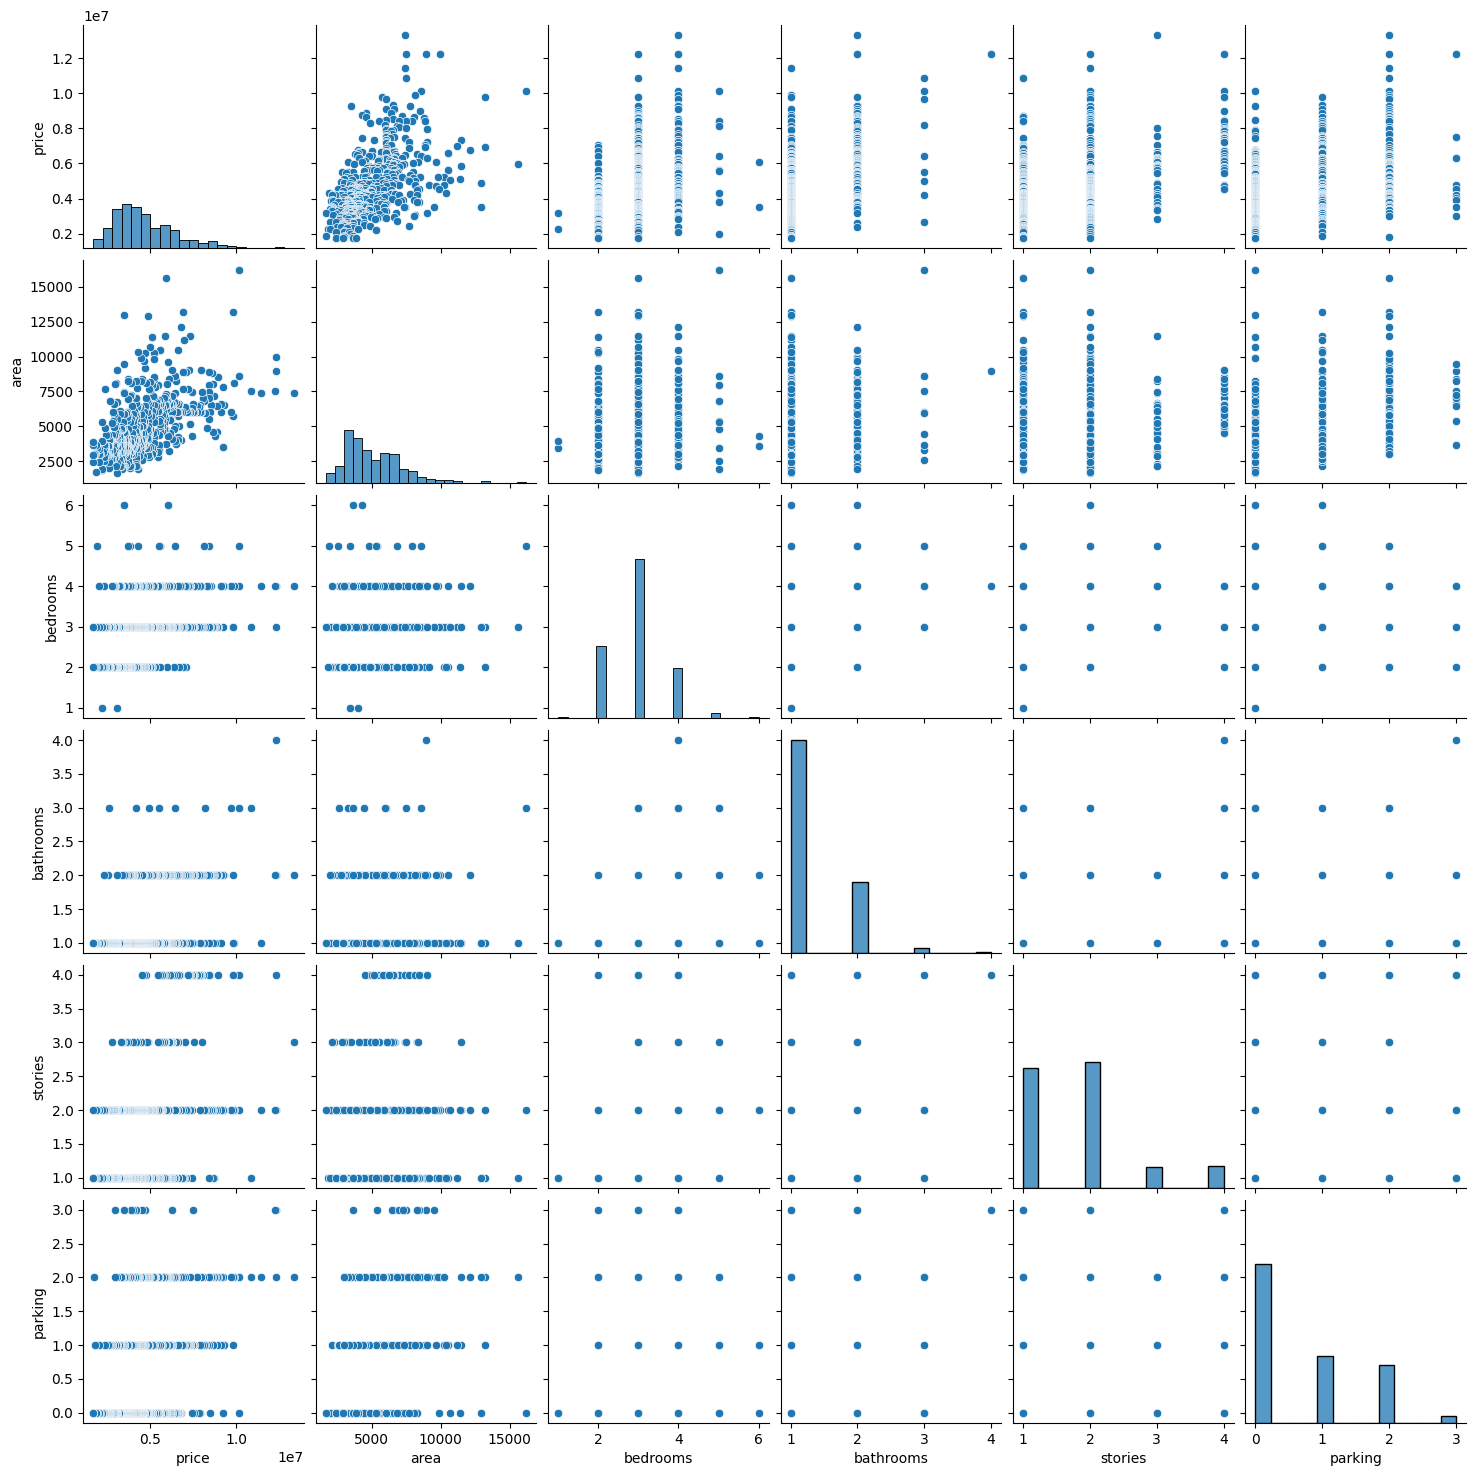

In [ ]:
sns.pairplot(df)

## Pair Plot Analysis

To understand the relationships between different features of the dataset, we used a **pair plot**. The plot provides:

- **Histograms along the diagonal** that show the distribution of individual features.
- **Scatter plots off the diagonal** that visualize pairwise relationships between features.

### Key Observations:
- `price` and `area` have a **strong positive correlation**, indicating that larger properties tend to be more expensive.
- Features like `bedrooms`, `bathrooms`, `stories`, and `parking` are discrete, and their influence on `price` is less linear but still significant.
- Most other relationships show **less distinct patterns**, suggesting that some variables might interact in more complex or nonlinear ways with `price`.

This visualization is useful for preliminary **exploratory data analysis (EDA)** and helps in identifying important features for predictive modeling.


### Step 4: Convert Categorical to Numeric

We convert **categorical variables** into **numeric** using one-hot encoding (`pd.get_dummies`). This is necessary because machine learning models work with numeric input.


In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


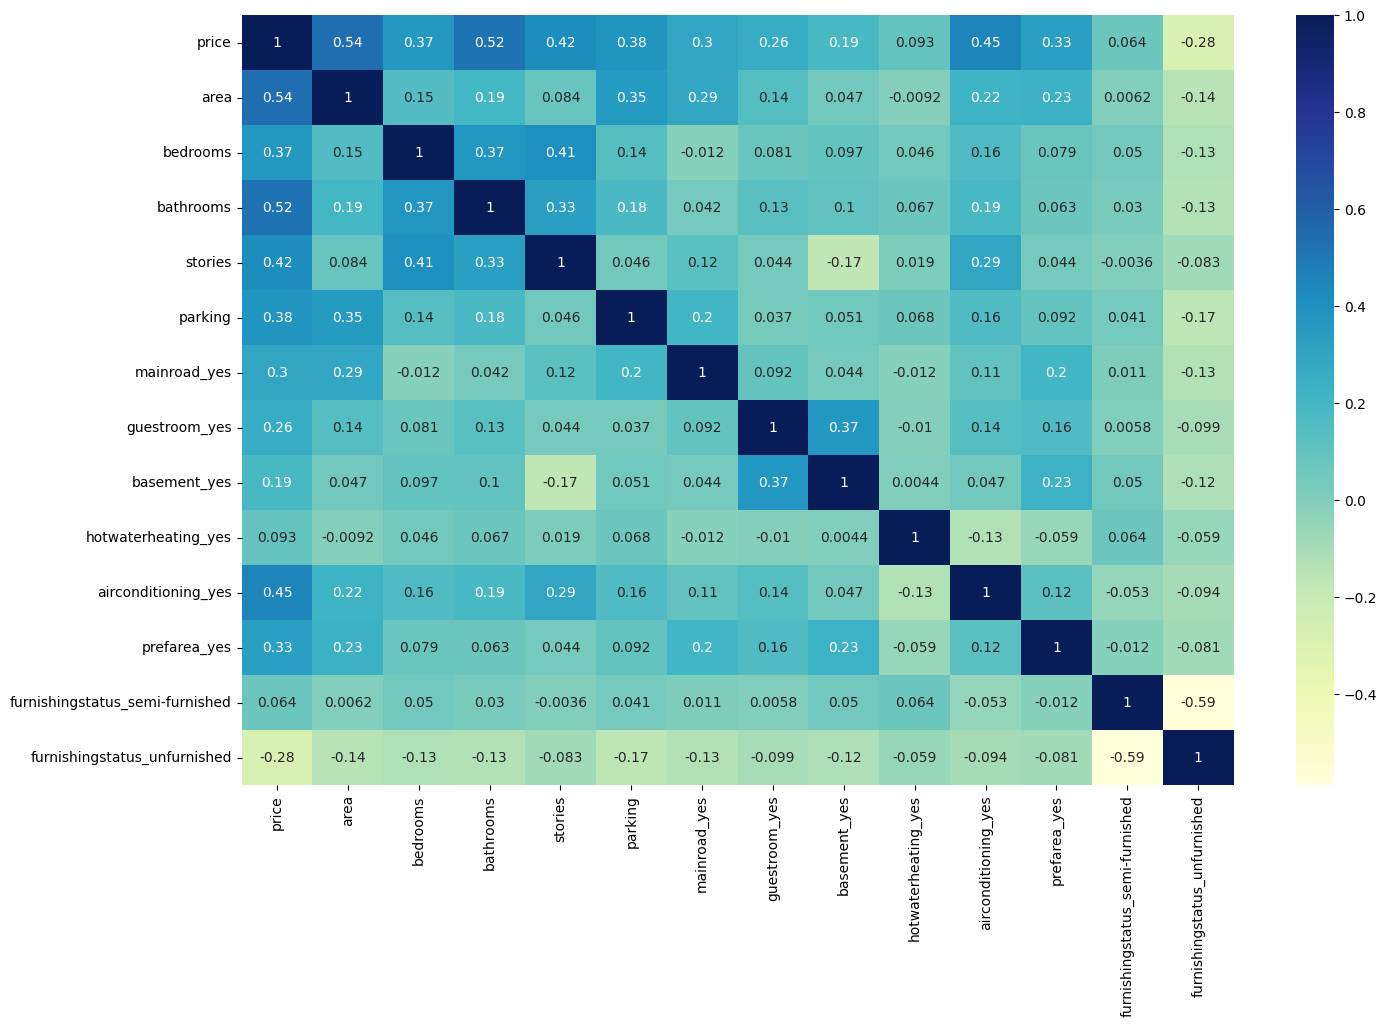

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df_encoded.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Correlation Heatmap

To better understand the linear relationships between variables in our dataset, we generated a **correlation heatmap** using Pearson correlation coefficients. This heatmap helps identify which features are most strongly associated with the target variable (`price`).

### Key Observations:

- `price` shows strong positive correlations with:
  - `area` (0.54)
  - `bathrooms` (0.52)
  - `airconditioning_yes` (0.45)
  - `stories` (0.42)
  - `bedrooms` (0.37)
  - `parking` (0.38)

- `furnishingstatus_unfurnished` has a moderate negative correlation with `price` (-0.28), suggesting unfurnished homes tend to have lower prices.

- Most other features show weak or negligible correlations with `price`.

- Strong negative correlation exists between:
  - `furnishingstatus_semi-furnished` and `furnishingstatus_unfurnished` (-0.59), which is expected due to their mutually exclusive nature.

This visualization is crucial for feature selection and gives insight into which variables may influence house prices the most in a linear regression model.


### Step 5: Define Features and Target


We separate the dataset into:
- `X` → Features (independent variables)
- `y` → Target (dependent variable, i.e., house price)

In [ ]:
X = df_encoded.drop('price', axis=1)  # Features
y = df_encoded['price']               # Target— the thing you want to predict


### Step 6: Split the Data

We split the data into:
- **Training set (80%)** to train the model
- **Test set (20%)** to evaluate its performance  
Using `train_test_split` from `sklearn`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 7: Train the Linear Regression Model

We train a **Linear Regression** model using `LinearRegression()` from Scikit-Learn and fit it on the training data.


In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

### Step 8: Make Predictions

We use the trained model to predict house prices on the test dataset.

In [ ]:
y_pred = lr_model.predict(X_test)


### Step 9: Evaluate the Model

We evaluate the model using:
- **Mean Squared Error (MSE)**: Measures average squared difference between predicted and actual values
- **R² Score**: Represents how well the model explains the variance in the data


In [ ]:
# R-squared
r2_score(y_test, y_pred)

0.6529242642153184

In [ ]:
# Mean Squared Error
mean_squared_error(y_test, y_pred)

1754318687330.6638

### Step 10: Visualize Predictions vs Actuals


We create a **scatter plot** to compare **Actual vs Predicted** house prices.  
Ideally, the points should lie along the diagonal line — the closer they are, the better the model is performing.


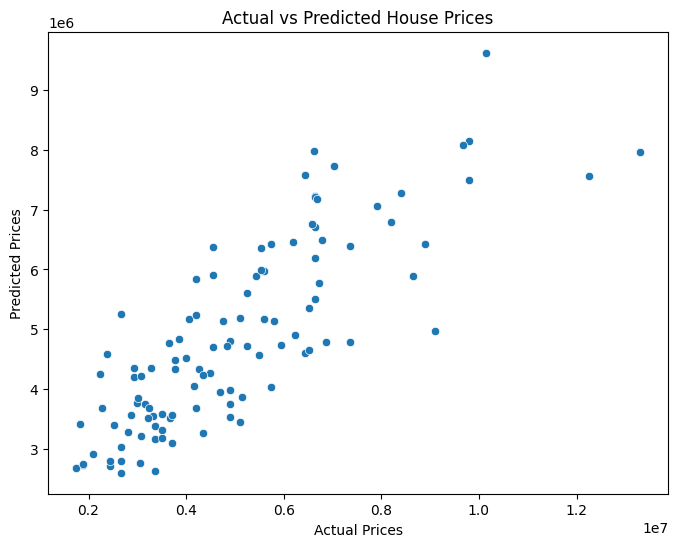

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()



### Step 11: Conclusion

- The model gives a good baseline using linear regression.
- However, there’s room for improvement using more complex techniques like:
  - Polynomial Regression
  - Feature Engineering
  - Regularization (Ridge/Lasso)

This project demonstrates how linear regression can be used to tackle real-world regression problems.
